### Project 3: Analyze A/B Test Results 
### Name: Andy Soelistio
### Submission Date: Oct-14-2018
### Course: Data Analyst Nanodegree 

## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df = pd.read_csv('ab_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].unique()

array([0, 1], dtype=int64)

In [7]:
df['converted'].mean()  

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
treatment_old = df[(df['group']=='treatment') & (df['landing_page']=='old_page')]
treatment_old.shape[0]

1965

In [9]:
control_new = df[(df['group']=='control') & (df['landing_page']=='new_page')]
control_new.shape[0]

1928

In [10]:
total_mismatches = treatment_old.shape[0] + control_new.shape[0]
total_mismatches

3893

f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
index_to_remove = treatment_old.append(control_new).index

In [13]:
df2 = df.drop(index_to_remove)  # removing rows 
df.shape[0]-df2.shape[0]        # confirmed

3893

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2['user_id'].nunique(),df2.shape[0]

(290584, 290585)

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop(index=2893,inplace=True)

In [19]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


In [20]:
df2.shape[0]

290584

In [21]:
# +++++++++++++++++++++++++++++ Now df2 is clean +++++++++++++++++++++++++

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2['converted'].mean(),df2['converted'].mean()*100

(0.11959708724499628, 11.959708724499627)

In [23]:
# this converted mean doesn't take into account of whether user belongs to control or treatment
# therefore I call it convert_neutral
convert_neutral = df2['converted'].mean()
convert_neutral

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
df2.query("group=='control'")['converted'].mean(),df2.query("group=='control'")['converted'].mean()*100

(0.1203863045004612, 12.03863045004612)

In [25]:
control_convert = df2.query("group=='control'")['converted'].mean()
# I use old_convert and control_convert interchangeably
old_convert = control_convert
old_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
df2.query("group=='treatment'")['converted'].mean(),df2.query("group=='treatment'")['converted'].mean()*100

(0.11880806551510564, 11.880806551510565)

In [27]:
treatment_convert = df2.query("group=='treatment'")['converted'].mean()
# I use treatment_convert and new_convert interchangeably
new_convert = treatment_convert
new_convert

0.11880806551510564

In [28]:
obs_old_diff_new = old_convert - new_convert
obs_old_diff_new

0.0015782389853555567

d. What is the probability that an individual received the new page?

In [29]:
df2.query("landing_page=='new_page'").count()[0] / df2.shape[0],\
        (df2.query("landing_page=='new_page'").count()[0] / df2.shape[0])*100

(0.5000619442226688, 50.00619442226688)

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.


These results suggest that there is not sufficient evidence to say that the treatment page leads to more conversions as the probability of conversion for the `treatment` group is less than that for the `control` group.

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$
H_0 : p_{old} \geq p_{new} \\
H_1 : p_{old} < p_{new}
$$



From above without even looking at the data, our null hypothesis suggests that old conversion rate (control) is greater or equal than the new (experiment) conversion rate. Since the operator used on null hypothesis is greater or equal, this is a one-tail test. We don't have to divide the alpha by 2.

Next I will convert the above hypothesis into a different format shown below:


$$
H_0 : p_{old} - p_{new} \geq 0 \\
H_1 : p_{old} - p_{new} < 0
$$


From the alternative hypothesis, we have to prove that  $p_{old} - p_{new}$ is less than 0. Therefore if observed difference between $p_{old}$ and $p_{new}$ (vertical line) is on the positive x-axis on the histogram, we can conclusively reject Alternative hypothesis in favor of Null hypothesis. However, if the observed difference between $p_{old}$ and $p_{new}$ (vertical line) is on the negative x-axis on the histogram, we reject Null hypothesis if p-value is less than alpha.

**NOTE:**<br>
Since $p_{old} - p_{new}$ is less than 0 for the Alternative hypothesis, p-value is on the left of observed ($p_{old} - p_{new}$) vertical line.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [30]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **convert rate** for $p_{new}$ under the null? 

In [31]:
convert_neutral

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
convert_neutral

0.11959708724499628

c. What is $n_{new}$?

In [33]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [34]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - convert_neutral), convert_neutral])
new_page_converted.mean()

0.12092079003509738

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - convert_neutral), convert_neutral])
old_page_converted.mean()

0.11885815768823052

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
new_page_converted.mean() - old_page_converted.mean()

0.0020626323468668634

In [38]:
# This is my version due to arrangment of my Hypothesis:
old_page_converted.mean() - new_page_converted.mean()

-0.0020626323468668634

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.choice([0,1],size=n_old,p=[(1 - convert_neutral), convert_neutral])
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - convert_neutral), convert_neutral])
    p_diffs.append(old_page_converted.mean()-new_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [40]:
p_diffs = np.asarray(p_diffs)

<a id='histogram_result'></a>
#### Histogram Result

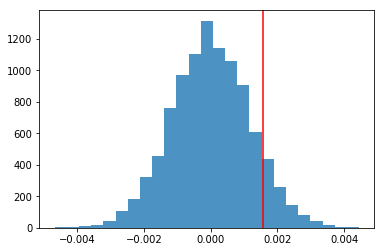

In [41]:
plt.hist(p_diffs,bins=25,alpha=0.8);
plt.axvline(x=obs_old_diff_new,c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?<br><br>
>**NOTE:**<br>
>Since $p_{old} - p_{new}$ is less than 0 for the Alternative hypothesis, p-value is on the left of observed ($p_{old} - p_{new}$) vertical line.

In [42]:
p_value = (p_diffs < obs_old_diff_new).mean()
p_value,p_value * 100

(0.9063, 90.63)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>This is a p-value. My p-value is 0.9062. Referring to my null and alternative hypothesis setup above, a positive p-value means that I can "fail to reject null hypothesis". In other words, reject alternative hypotheis in favor of null hypothesis. Thus the conversion rate of the old landing page is greater or equal to the new landing page.<br>
>
>Also note that the alpha (Type-I error) for the setup is 5% (0.05). If my p-value is less than this alpha value then this will be statistically significant. It means that I have to reject null hypothesis in favor of alternative hypothesis. 
>

<a id='practical_significance'></a>
#### Practical Significance
>In addition to the concept of statistical significance, you also have to be aware of practical significance. Let say that Audacity has unlimited budget, the head of Audacity web admnistrator may still decide to change the old landing page to a new one (even though the new landing web page doesn't translate to higher conversion rate than the old landing page). This decision is based on personal or austhetic choice. This is "practical" significance (although it may seem impractical since more money has to be spent to make a new landing page with no increment in conversion rate).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
import statsmodels.api as sm

# This is the number of converted in old/control landing page
convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
# This is the number of converted in new/experiment landing page
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()
# This is the sample size of old landing page
n_old = n_old  # already calculated above
# This is the sample size of new landing page 
n_new = n_new   # already calculated above

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.
<br><br>
#### Parameters used in `stats.proportions_ztest`
>
>**count** : integer or array_like
>    the number of successes in nobs trials. If this is array_like, then
>    the assumption is that this represents the number of successes for
>    each independent sample
<br><br>
>**nobs** : integer or array-like
>    the number of trials or observations, with the same length as
>    count.
<br><br>
>**alternative** : string in ['two-sided', 'smaller', 'larger']
>    The alternative hypothesis can be either two-sided or one of the one-
>    sided tests, smaller means that the alternative hypothesis is
>    ``prop < value`` and larger means ``prop > value``. In the two sample
>    test, smaller means that the alternative hypothesis is ``p1 < p2`` and
>    larger means ``p1 > p2`` where ``p1`` is the proportion of the first
>    sample and ``p2`` of the second one.
>

<a id='z_score'></a>
#### Handy method to get z-score and p-value

In [44]:
z_score_result,p_value_result = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score_result,p_value_result

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The `p_value_result` obtained from `sm.stats.proportions_ztest` indeed agree with `j` and `k` above. In addition, this handy method also returns a z_score. Checking with a z-table, p_value of 0.905 does indeed corresponds to a z_score of 1.31!
><br><br>
When the z_score is 0, there is no difference in old and new conversion rates. When the z_score is 1.31, it means that there is a positive difference between old and new conversion rates. This positive difference is 1.31 STD away from the mean. This agrees with our null hypothesis. Thus we can not reject null hypothesis. Thus we reject alternative hypothesis in favor of null hypothesis. This means that old conversion rate is greater or equal to alternative hypothesis, which agrees with my observation in `k` above.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>Since each row is either a conversion or no conversion, **Logistic Regression** is used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [46]:
df2[['ab_page','old_page']] = pd.get_dummies(df2['landing_page'])
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,old_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [47]:
import statsmodels.api as sm

In [48]:
logit_model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

<a id='z_score_logit'></a>
#### z_score from Logistic Regression is -1.311

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        03:33:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<a id='histogram_two_tail'></a>
#### Histogram two-tail

> The p-value obtained from logistic regression is 0.19. This is not statistically significant since it is less than  $\alpha$ level of 0.05. Therefore we can reject the Null in this case. 

> The difference in p-value in logistic regression from `Part II` is that in logistic regression, the p-value is a two tail test. Below is what it will be like if we take a two-tail test for bootstrapped sampling distribution.

In [50]:
upper = obs_old_diff_new
lower = p_diffs.mean() - upper
upper,lower

(0.0015782389853555567, -0.001574302323197726)

In [51]:
# Calculate area of lower tail
p_lower = (p_diffs < lower).mean()
p_lower

0.0895

In [52]:
# Calculate area of upper tail
p_upper = (p_diffs > upper).mean()
p_upper

0.0937

> Two tail p-value obtained from bootstrapped sampling is 0.1883. Still similar in value to p-value obtained from logistic regression obtained above (0.19).

In [53]:
two_tail_p_val = p_lower + p_upper
two_tail_p_val

0.1832

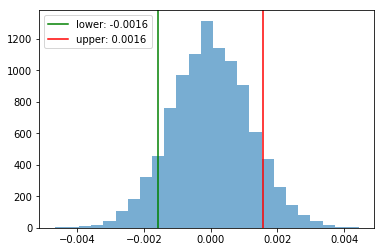

In [54]:
plt.hist(p_diffs,bins=25,alpha=0.6);
plt.axvline(x=lower,c='green',label='lower: ' + str(round(lower,4)));
plt.axvline(x=upper,c='red',label='upper: ' + str(round(upper,4)));
plt.legend();

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Generally increasing other independent variables increases R square. But be aware of multicollinearity. Check VIF (variance inflation factor) if it is above 10. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [56]:
countries_df.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [57]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [58]:
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head(3)

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0


In [59]:
# make US the base country
log_model = sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Oct 2018   Pseudo R-squ.:               1.521e-05
Time:                        03:33:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

>Country has no impact on conversion. p-values are above $\alpha$ (0.05). Therfore we fail to reject Null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1


In [61]:
log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Oct 2018   Pseudo R-squ.:               3.482e-05
Time:                        03:33:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

<a href='https://en.wikipedia.org/wiki/A/B_testing'>A/B testing </a> is a randomized experiment with two variants, A and B. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective. <br>

Version A is the currently used version (control), while version B is a new version(treatment). <br><br>

From the <a href='#histogram_result'>histogram result above</a>, p-value is 0.9064 which is greater than alpha value of 0.05. Therefore we fail to reject the Null hypohtesis. The old variant is equal or better than the new variant. I also use a handy method to obtain p-value and z-score. <a href='#z_score'>Here is the link.</a> Note the z-score obtained is 1.31, which is positive. <br><br>

We can also use <a href='#z_score_logit'>LogisticRegression to obtain p-value.</a> The p-value obtained from this method is 0.19. This is nearly double the value we obtained above. Two-tail test is used in LogisticRegression method. <a href='#histogram_two_tail'>Click this link for further explanation.</a> Again this p-value is greater than alpha value of 0.05, so we fail to reject the Null hypothesis. In addition, the z-value obtained from this method is -1.31, which is a negative. This is different from the result <a href='#z_score'>I obtain above</a>, which is positive. This is because my hypothesis is:

$$
H_0 : p_{old} - p_{new} \geq 0 \\
H_1 : p_{old} - p_{new} < 0
$$

If my hypothesis is 
$$
H_0:  p_{new} - p_{old} \leq 0  \\
H_1: p_{new} - p_{old} > 0
$$
<br>
the z-value sign will be the same. (Note to self: consider using the above hypothesis in next project)
<br><br>
Adding variables such as countries do not lead us to reject the Null hypothesis in favor of Alternative hypothesis also, since all p-values are NOT statistically significant i.e., p-value is less than alpha value.
<br><br>
In conclusion, I recommend the e-commerce company to stick to the old page. I will leave this decision to the head of web-administrator of that company. Maybe due to personal aesthetics or reasons, he/she may decide to switch to the new landing page. <a href='#practical_significance'>Practical Significance is also discussed above.</a>



